In [71]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
np.set_printoptions(precision=6, formatter={'all': lambda x: f'{x:f}'})

# **Polynomial**

$$ y = 1 + 2x^2 + 5x^4 $$
and get the value of $y$ using $x=6$ 
Manual Method

In [72]:
coef = [1,0,2,0,5]
degree = len(coef)-1

x = 6.0

def sum_all(x,coef):
  sum, pow = 0,0
  for i in coef:
    sum+=(i)*(x**pow)
    pow+=1
  return sum
p_x = sum_all(x,coef)
print(p_x)

6553.0


Just Polynomial import diye $P = Polynomial([a,b,c,d])$

In [73]:
coeff = np.array([1.0, 0.0, 2.0, 0.0, 5.0])
x_arr = np.array([1, 2, 3, 4, 5])
P = Polynomial(coeff)
y_arr = P(x_arr)
print(x_arr,y_arr)

[1.000000 2.000000 3.000000 4.000000 5.000000] [8.000000 89.000000 424.000000 1313.000000 3176.000000]


# **Vandermod**
Extract the $x$ and $y$ in matrix and get the values of the $a$ and make a polynomial using the values of $a$
$$a=YX^{-1}$$
where $\mathbf{X} = $

\begin{bmatrix}
x^0 & x^1 & x^2 & \cdots & x^n\\
x^0 & x^1 & x^2 & \cdots & x^n\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x^0 & x^1 & x^2 & \cdots & x^n\\
\end{bmatrix}

Inverse matrix: ``X_inv = np.linalg.pinv(x)``

In [74]:
def vandermod_ploy(data_x, data_y):
  nodes = len(data_x)
  X = np.zeros((nodes,nodes))
  for row in range(nodes): # Making X matrix x^0, x^1, x^2 ..
    for col in range(nodes):
      X[row][col] = data_x[row]**col

  # Inverse X Matrix-------------------------------
  X_inv = np.linalg.inv(X)
  # -----------------------------------------------
  a = np.dot(X_inv,data_y) # y_data*X_inv doesn't work

  P = Polynomial(a)
  
  return P

# **Graph**
Steps:
  1. data_x and data_y for the dots
  2. Continuous x_arr from lowest to highest for the line ``np.linspace(low,high,count)``
  3. Put the x_arr value in to the polynomial created to get y_arr
  4. x_arr, y_arr for the line

1.0 - 5.075 x + 5.520833 x**2 + 4.854167 x**3 - 1.020833 x**4 -
0.279167 x**5


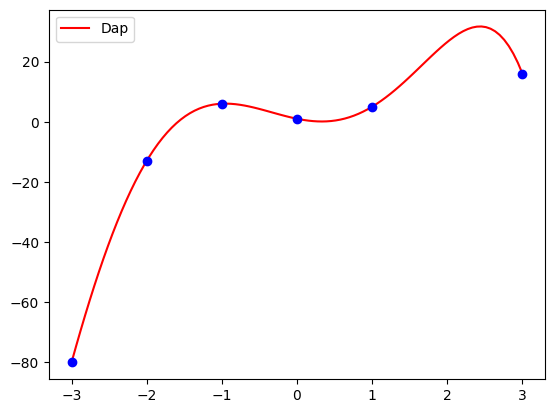

In [75]:
data_x = np.array([-3., -2., -1., 0., 1., 3.])
data_y = np.array([-80., -13., 6., 1., 5., 16.])
p = vandermod_ploy(data_x, data_y)
print(p)

x_arr = np.linspace(-3,3,100)
y_arr = p(x_arr)

plt.plot(x_arr,y_arr,'r', label="Dap")
plt.plot(data_x, data_y,'bo') # b = Blue; o = golla; * dile star hobe
plt.legend()
plt.show()

# **Lagrange**
Steps:
  1. Take data_x and data_y as input.

  2. ``__call__()`` diye $p_n(x) = \sum_{k=0}^{n} f(x_k)l_k(x)$ main calculation ta korbo. Which will take x_arr and return y_arr(interpolated value)

  3. ``l()`` diye $l_k(x)$ er values ber korbo

In [76]:
class Lagrange_Poly():
  def __init__(self,data_x,data_y):
    assert len(data_x) == len(data_y), "Length of data_x and data_y must be equal"
    self.data_x = data_x
    self.data_y = data_y
    self.degree = len(data_x)-1
  
  def __repr__(self):
    res = f"Lagrange Polynomial of degree {self.degree}:\n"
    res += "p(x)= "
    for i in range(len(data_y)):
      if i>0:
        res+= f"+ {self.data_y[i]}*l_{i}(x)"
      elif i<0:
        res+= f"- {self.data_y[i]}*l_{i}(x)"
    return res
  
  def __call__(self, x_arr):
    y_arr = np.zeros(x_arr.shape)

    for i in range(len(x_arr)):
      x = x_arr[i]
      for k in range(len(data_x)):
        y_arr[i] += self.data_y[k]*self.l(x,k)
    return y_arr
  
  def l(self,x,k):
    l_k = 1
    for i in range(len(data_x)):
      a = self.data_x[k]
      if i != k:
        b = self.data_x[i]
        l_k *= (x-b)/(a-b)
    return l_k

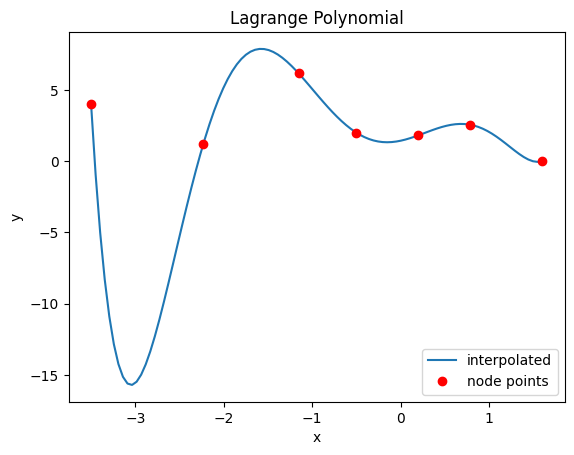

In [77]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange_Poly(data_x, data_y)
#print(p) 

x_arr = np.linspace(-3.5, 1.6, 100)
p_x_arr = p(x_arr)

plt.plot(x_arr, p_x_arr)
plt.plot(data_x, data_y, 'ro')
plt.legend(['interpolated', 'node points'], loc = 'lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Polynomial')
plt.show()

# **Newton's Divided Difference**
  1. Make the newton table or something using `calc_div_diff()`
  2. Vitore first e sob `y` gula `col 0` e add korbo and then loop shuru hobe `col 1` theke till `node-row` porjonto so the matrix becomes like a triangle
  3. $(y_2-y_1)/(x_2-x_1)$ use kore porer columns fill korbo jekhane y2 always same row ager col and y1 nicher row ager col
  4. Calculate
  `f(x) = f [x0] + (x-x0) f[x0,x1] + (x-x0) (x-x1) f[x0,x1,x2] + . . . + (x-x0) (x-x1) . . . (x-xk-1) f[x0, x1, . . ., xk]`
  using `n()` to do the `(x-x0)(x-x1)` and `__call__()` to do the full multiplication and sum `(x-x0) f[x0,x1]+`

In [78]:
def calc_div_diff(data_x,data_y):
  nodes = len(data_x)
  coef = np.zeros((nodes,nodes))
  for i in range(nodes):
    coef[i][0] = data_y[i]

  for col in range(1,nodes):
    for row in range(nodes-col):
      b2 = coef[row+1][col-1]
      b1 = coef[row][col-1]
      a2 = data_x[row+col]
      a1 = data_x[row]
      
      coef[row][col] = (b2-b1)/(a2-a1)
  return coef[0]

In [79]:
class Newtons_Divided_Differences:
  def __init__(self, differences, data_x):
    self.differences = differences
    self.data_x = data_x
  def __call__(self,x_arr):
    y_arr = np.zeros(x_arr.shape)
    
    for i in range(len(y_arr)):
      x = x_arr[i]
      for k in range(len(self.differences)):
        y_arr[i] += self.differences[k]*self.n(k,x)
    return y_arr
  
  def n(self,k,x):
    res = 1
    for i in range(k):
      res *= (x-self.data_x[i])
    return res

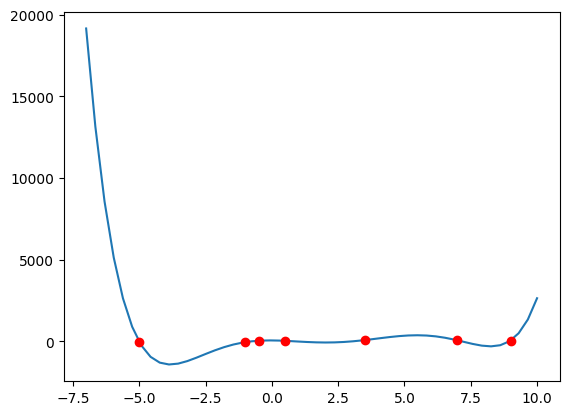

In [80]:
data_x = np.array([-5.,-1,-0.5,0.5,3.5,7.,9])
data_y = np.array([-30., -50., 36., 31., 75., 60., 46.])
differences = calc_div_diff(list(data_x), list(data_y))
p = Newtons_Divided_Differences(list(differences),data_x)
test_x = np.linspace(-7, 10, 50, endpoint=True)
test_y = p(test_x)

plt.plot(test_x, test_y)
plt.plot(data_x, data_y, 'ro')
plt.show()

# **Differentiation**
The equations are as follows,

\begin{align}
\text{forward differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x)}{h} \\
\text{backward differentiation}, f^\prime(x) \simeq \frac{f(x)-f(x-h)}{h}  \\
\text{central differentiation}, f^\prime(x) \simeq \frac{f(x+h)-f(x-h)}{2h}
\end{align}

In [81]:
def forward_diff(f,h,x):
  return (f(x+h)-f(x))/h

def backward_diff(f,h,x):
  return (f(x)-f(x-h))/h

def central_diff(f,h,x):
  return (f(x+h)-f(x-h))/(2*h)

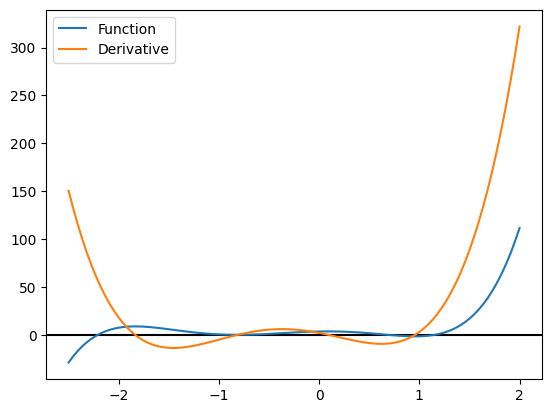

In [82]:
p = Polynomial([3.5, 2.0, -10.0, -6.0, 6.0, 3.0])

x_values = np.linspace(-2.5, 2.0, 100)
y_values = p(x_values)

p_prime = p.deriv(1)
y_prime_values = p_prime(x_values)

plt.axhline(y=0, color='k')  # Add a horizontal line at y=0 for reference
plt.plot(x_values, y_values, label='Function')
plt.plot(x_values, y_prime_values, label='Derivative') 
plt.legend()

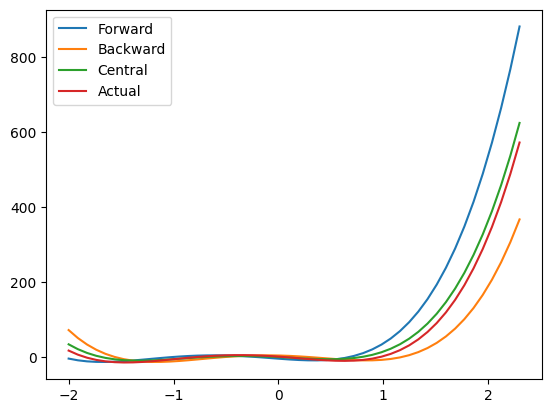

In [83]:
h = 0.5
x_vals = np.linspace(-2,2.3,50)

y_vals = forward_diff(p,h,x_vals)
plt.plot(x_vals,y_vals,label="Forward")
y_vals = backward_diff(p,h,x_vals)
plt.plot(x_vals,y_vals,label="Backward")
y_vals = central_diff(p,h,x_vals)
plt.plot(x_vals,y_vals,label="Central")

p_prime = p.deriv(1)
y_vals = p_prime(x_vals)
plt.plot(x_vals, y_vals, label="Actual")

plt.legend()
plt.show()

In [84]:
def error(f,f_prime,h,x):
  y_correct = f_prime(x)
  f_error = np.zeros(h.shape) 
  b_error = np.zeros(h.shape) 
  c_error = np.zeros(h.shape)

  for i in range(len(h)):
    f_error[i] = forward_diff(f,h[i],x)-y_correct
    b_error[i] = backward_diff(f,h[i],x)-y_correct
    c_error[i] = central_diff(f,h[i],x)-y_correct
  return (f_error,b_error,c_error)

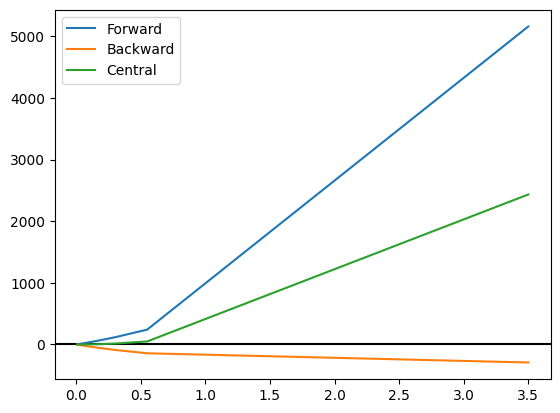

In [85]:
h = np.array([3.5, 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
err = error(p, p_prime, h, 2.0)

plt.axhline(y=0, color='k')
plt.plot(h, err[0], label='Forward')
plt.plot(h, err[1], label='Backward')
plt.plot(h, err[2], label='Central')
plt.legend()
plt.show()